# Lista de exercícios 1
## EX-1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Parâmetros do problema:
d = 5                             # dimensão do espaço de vetores de entrada
x = np.random.random(d) - 0.5     # vetor de entrada
w = np.random.random(d)           # vetor de pesos
b = np.random.random(1) - 0.5     # escalar de bias

def neuronEval(x, w, b=None):
    """
    Funcao que avalia a resposta de um neuronio.
    """
    if (b is not None):
        x = np.append(x, 1)
        w = np.append(w, b)
    y = np.sign(np.dot(x,w))
    if y == 0:
        y = -1
    return y

print 'Vetor de entrada:', x
print 'Vetor de pesos:', w
print 'Escalar bias:', b
print '\nResultado do neuronio:', neuronEval(x, w, b)


Vetor de entrada: [ 0.40799745  0.07082676 -0.08645279 -0.34736722  0.06623883]
Vetor de pesos: [ 0.06635502  0.71607622  0.41997179  0.19123908  0.77783302]
Escalar bias: [-0.41148715]

Resultado do neuronio: -1.0


## EX-2

In [3]:


def plotSepPlane(df, w, x_i=None, no_plot=False, ax=None, writer=None):
    if (ax is None):
        fig, ax = plt.subplots(figsize=(5,5))
        ax = plt.subplot()
    else:
        ax.clear()
    ax = df.plot(ax=ax, kind='scatter', x='x1', y='x2',
                 c=df_train.y.map(lambda x: 'blue' if (x > 0) else 'red'),
                 s=50, marker='o',
                 #marker=df_train.y.map(lambda x: '+' if (x > 0) else '-')
                )
    if 'right_answer' in df.columns:
        df.plot(ax=ax, kind='scatter', x='x1', y='x2', c='none', s=100,
                marker='o',
                edgecolors=df.right_answer.map(lambda x: 'blue' if (x > 0) else 'red'))
    if not (x_i is None):
        plt.scatter(x_i[0], x_i[1], marker='o', s=350, c='none', edgecolors='green')
    if not (w is None):
        x1 = np.linspace(df.x1.min(), df.x1.max(), 2)
        if (w[1] == 0) and (w[0] != 0):
            x2 = np.linspace(df.x2.min(), df.x2.max(), 2)
            x1 = np.ones(2) * -w[2]/w[0]
        elif (w[0] == 0) and (w[1] != 0):
            x2 = np.ones(2) * -w[2]/w[1]
        elif (w[0] == 0) and (w[1] == 0):
            x1 = [0]
            x2 = [0]
        else:
            x2 = (-w[0]*x1 - w[2])/w[1]
        ax.plot(x1, x2, 'r')
    
    if no_plot:
        return ax
    elif not (writer is None):
        ax.set_xlim(-3,7)
        ax.set_ylim(-3,7)
        writer.grab_frame()
    else:
        plt.show()


,x1,x2,y
0,3.074146,0.870136,1.0
1,-0.657861,0.705516,1.0
2,0.715532,3.117501,1.0
3,1.750288,1.218690,1.0
4,2.147041,1.414536,1.0
5,0.164363,1.718713,1.0
6,-0.415178,1.820485,1.0
7,0.052265,2.140730,1.0
8,1.574225,2.085785,1.0
9,1.190713,1.170189,1.0


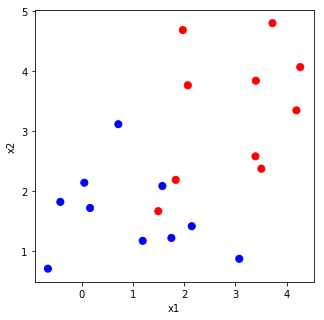

C:\Users\Lenovo\Miniconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



------------
Rodada #0

> x_i: [ 4.26300362  4.07086911  1.        ]
> w_i: [-0.05131766 -0.30701221  1.        ]
> y_i: -1.0
> y_hat: -1.0

> x_i: [ 3.07414614  0.8701358   1.        ]
> w_i: [-0.05131766 -0.30701221  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.75028815  1.21868962  1.        ]
> w_i: [-0.05131766 -0.30701221  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.49392613  1.6656972   1.        ]
> w_i: [-0.05131766 -0.30701221  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.05878729 -0.3153407   0.995     ]

> x_i: [-0.65786095  0.70551642  1.        ]
> w_i: [-0.05878729 -0.3153407   0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.83423052  2.18814808  1.        ]
> w_i: [-0.05878729 -0.3153407   0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.06795844 -0.32628144  0.99      ]

> x_i: [ 0.71553175  3.11750124  1.        ]
> w_i: [-0.06795844 -0.32628144  0.99      ]
> y_i: 1.0
> y_hat: -1.0
**********Atualiza

,x1,x2,y,b,y_hat,right_answer
0,3.074146,0.870136,1.0,1,1.0,1.0
1,-0.657861,0.705516,1.0,1,1.0,1.0
2,0.715532,3.117501,1.0,1,-1.0,-1.0
3,1.750288,1.218690,1.0,1,1.0,1.0
4,2.147041,1.414536,1.0,1,1.0,1.0
5,0.164363,1.718713,1.0,1,1.0,1.0
6,-0.415178,1.820485,1.0,1,1.0,1.0
7,0.052265,2.140730,1.0,1,1.0,1.0
8,1.574225,2.085785,1.0,1,1.0,1.0
9,1.190713,1.170189,1.0,1,1.0,1.0


,x1,x2,y
0,0.562498,1.403588,1.0
1,1.054206,2.077679,1.0
2,1.069495,1.323224,1.0
3,2.061280,1.332598,1.0
4,-0.571787,3.525764,1.0
5,-0.120537,1.850168,1.0
6,0.458035,-0.100777,1.0
7,0.411889,1.054816,1.0
8,1.313295,-0.709584,1.0
9,0.171006,0.828559,1.0


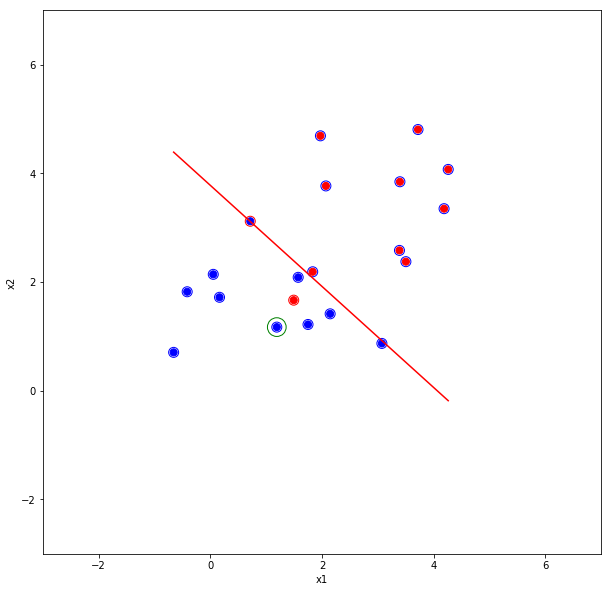

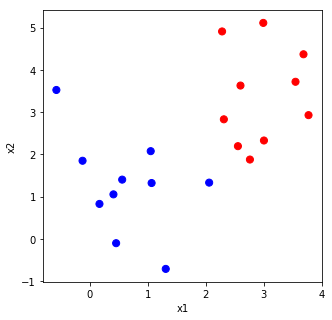


------------
Rodada #0

> x_i: [ 1.3132954  -0.70958396  1.        ]
> w_i: [ 0.21626243 -0.11482046  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.31471534  2.83137803  1.        ]
> w_i: [ 0.21626243 -0.11482046  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.20468886 -0.12897736  0.995     ]

> x_i: [ 2.99415781  5.11347864  1.        ]
> w_i: [ 0.20468886 -0.12897736  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.18971807 -0.15454475  0.99      ]

> x_i: [ 0.56249754  1.40358818  1.        ]
> w_i: [ 0.18971807 -0.15454475  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 0.17100592  0.8285591   1.        ]
> w_i: [ 0.18971807 -0.15454475  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [-0.57178667  3.52576432  1.        ]
> w_i: [ 0.18971807 -0.15454475  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.76392998  1.87897668  1.        ]
> w_i: [ 0.18971807 -0.15454475  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizand

,x1,x2,y,b,y_hat,right_answer
0,0.562498,1.403588,1.0,1,1.0,1.0
1,1.054206,2.077679,1.0,1,1.0,1.0
2,1.069495,1.323224,1.0,1,1.0,1.0
3,2.061280,1.332598,1.0,1,1.0,1.0
4,-0.571787,3.525764,1.0,1,1.0,1.0
5,-0.120537,1.850168,1.0,1,1.0,1.0
6,0.458035,-0.100777,1.0,1,1.0,1.0
7,0.411889,1.054816,1.0,1,1.0,1.0
8,1.313295,-0.709584,1.0,1,1.0,1.0
9,0.171006,0.828559,1.0,1,1.0,1.0


,x1,x2,y
0,1.700972,2.456405,1.0
1,0.979226,0.230676,1.0
2,-0.062093,0.782700,1.0
3,0.373452,1.348982,1.0
4,0.984597,0.086947,1.0
5,2.102878,0.639939,1.0
6,1.429106,1.220751,1.0
7,1.566036,1.630305,1.0
8,0.918903,2.400861,1.0
9,0.551026,3.777010,1.0


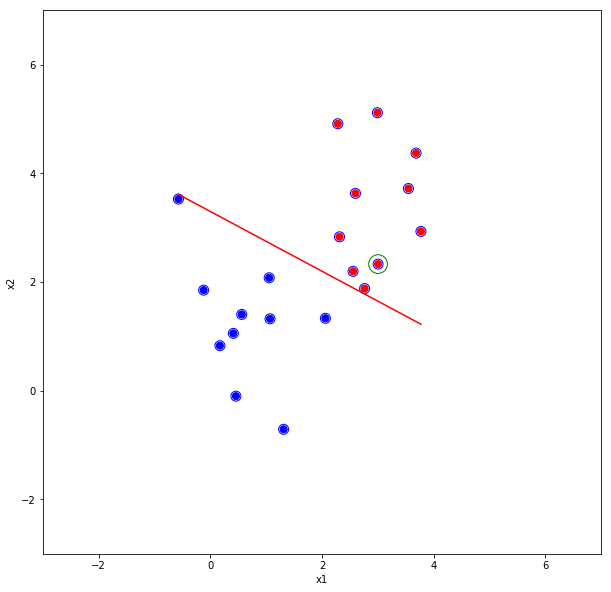

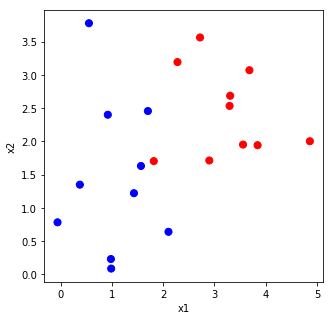


------------
Rodada #0

> x_i: [ 1.81604447  1.70323778  1.        ]
> w_i: [ 0.37830326  0.07173849  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.36922304  0.0632223   0.995     ]

> x_i: [ 2.10287778  0.63993926  1.        ]
> w_i: [ 0.36922304  0.0632223   0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.42910583  1.22075115  1.        ]
> w_i: [ 0.36922304  0.0632223   0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 3.55735948  1.95204755  1.        ]
> w_i: [ 0.36922304  0.0632223   0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.35143624  0.05346206  0.99      ]

> x_i: [ 4.86121044  2.00213507  1.        ]
> w_i: [ 0.35143624  0.05346206  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.32713019  0.04345139  0.985     ]

> x_i: [ 3.3059992   2.68633284  1.        ]
> w_i: [ 0.32713019  0.04345139  0.985     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.31060019  0.03001972

,x1,x2,y,b,y_hat,right_answer
0,1.700972,2.456405,1.0,1,-1.0,-1.0
1,0.979226,0.230676,1.0,1,1.0,1.0
2,-0.062093,0.782700,1.0,1,1.0,1.0
3,0.373452,1.348982,1.0,1,1.0,1.0
4,0.984597,0.086947,1.0,1,1.0,1.0
5,2.102878,0.639939,1.0,1,1.0,1.0
6,1.429106,1.220751,1.0,1,1.0,1.0
7,1.566036,1.630305,1.0,1,1.0,1.0
8,0.918903,2.400861,1.0,1,1.0,1.0
9,0.551026,3.777010,1.0,1,1.0,1.0


,x1,x2,y
0,2.357509,1.738323,1.0
1,-0.943380,1.569499,1.0
2,1.599672,1.396004,1.0
3,1.126663,0.464222,1.0
4,0.023748,0.583064,1.0
5,1.787343,2.368109,1.0
6,1.839617,1.113317,1.0
7,-0.261161,1.515749,1.0
8,3.265393,2.865455,1.0
9,1.334566,0.651118,1.0


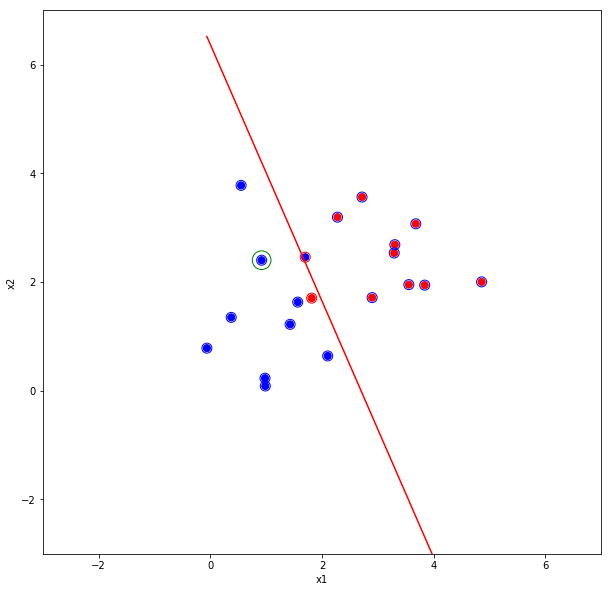

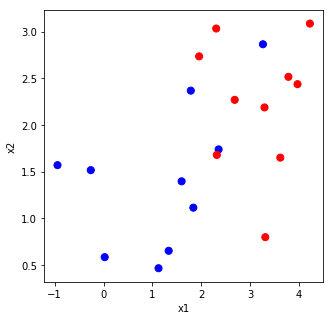


------------
Rodada #0

> x_i: [ 1.95817772  2.73552641  1.        ]
> w_i: [ 0.16155324 -0.27664153  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.15176235 -0.29031916  0.995     ]

> x_i: [ 3.97413226  2.43758234  1.        ]
> w_i: [ 0.15176235 -0.29031916  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.13189169 -0.30250707  0.99      ]

> x_i: [ 1.78734272  2.36810897  1.        ]
> w_i: [ 0.13189169 -0.30250707  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.33456593  0.65111797  1.        ]
> w_i: [ 0.13189169 -0.30250707  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.83961696  1.11331702  1.        ]
> w_i: [ 0.13189169 -0.30250707  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.32090581  1.6788585   1.        ]
> w_i: [ 0.13189169 -0.30250707  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.12028716 -0.31090137  0.985     ]

> x_i: [ 2.35750858  1.73832338  1.        ]
> w_i: [ 0.1202

,x1,x2,y,b,y_hat,right_answer
0,2.357509,1.738323,1.0,1,1.0,1.0
1,-0.943380,1.569499,1.0,1,1.0,1.0
2,1.599672,1.396004,1.0,1,1.0,1.0
3,1.126663,0.464222,1.0,1,1.0,1.0
4,0.023748,0.583064,1.0,1,1.0,1.0
5,1.787343,2.368109,1.0,1,1.0,1.0
6,1.839617,1.113317,1.0,1,1.0,1.0
7,-0.261161,1.515749,1.0,1,1.0,1.0
8,3.265393,2.865455,1.0,1,-1.0,-1.0
9,1.334566,0.651118,1.0,1,1.0,1.0


,x1,x2,y
0,0.222418,0.944739,1.0
1,0.648568,1.432700,1.0
2,0.072587,2.062573,1.0
3,0.969461,1.223625,1.0
4,0.152588,-0.150132,1.0
5,0.825910,0.774104,1.0
6,1.143291,0.810531,1.0
7,1.343115,2.646310,1.0
8,1.732834,0.790986,1.0
9,0.926390,1.150317,1.0


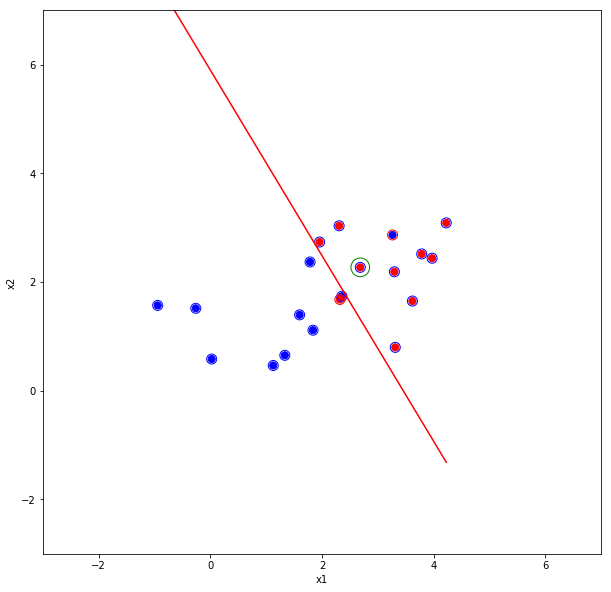

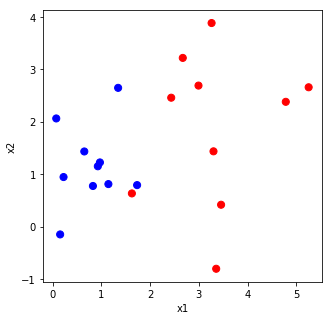


------------
Rodada #0

> x_i: [ 3.4575514   0.41612355  1.        ]
> w_i: [ 0.36479693 -0.34643627  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.34750917 -0.34851689  0.995     ]

> x_i: [ 0.96946141  1.22362454  1.        ]
> w_i: [ 0.34750917 -0.34851689  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.14329081  0.81053147  1.        ]
> w_i: [ 0.34750917 -0.34851689  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.43340871  2.45837578  1.        ]
> w_i: [ 0.34750917 -0.34851689  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.33534213 -0.36080877  0.99      ]

> x_i: [ 0.92638995  1.15031653  1.        ]
> w_i: [ 0.33534213 -0.36080877  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 3.35687593 -0.80513846  1.        ]
> w_i: [ 0.33534213 -0.36080877  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.31855775 -0.35678307  0.985     ]

> x_i: [ 4.78606169  2.37984689  1.        ]
> w_i: [ 0.3185

,x1,x2,y,b,y_hat,right_answer
0,0.222418,0.944739,1.0,1,1.0,1.0
1,0.648568,1.432700,1.0,1,1.0,1.0
2,0.072587,2.062573,1.0,1,1.0,1.0
3,0.969461,1.223625,1.0,1,1.0,1.0
4,0.152588,-0.150132,1.0,1,1.0,1.0
5,0.825910,0.774104,1.0,1,1.0,1.0
6,1.143291,0.810531,1.0,1,1.0,1.0
7,1.343115,2.646310,1.0,1,1.0,1.0
8,1.732834,0.790986,1.0,1,1.0,1.0
9,0.926390,1.150317,1.0,1,1.0,1.0


,x1,x2,y
0,0.446069,0.824197,1.0
1,1.501693,1.232220,1.0
2,0.279314,0.247343,1.0
3,1.702406,0.256607,1.0
4,0.248745,-0.346663,1.0
5,1.722250,3.331816,1.0
6,0.393698,0.388291,1.0
7,3.229300,1.858393,1.0
8,-0.244028,0.722845,1.0
9,0.087583,3.026234,1.0


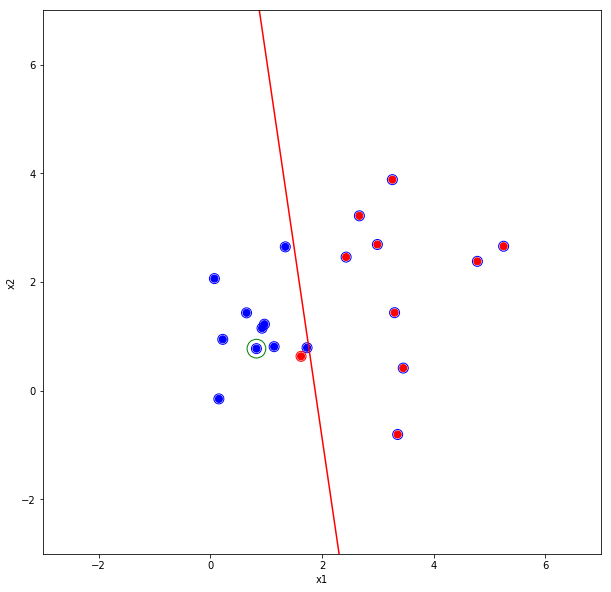

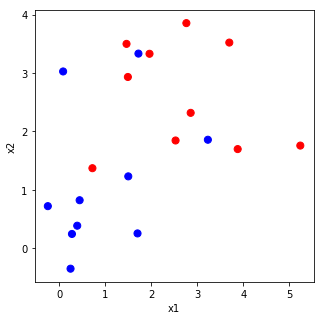


------------
Rodada #0

> x_i: [ 1.49324063  2.93187092  1.        ]
> w_i: [-0.05254077 -0.07255355  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.06000697 -0.0872129   0.995     ]

> x_i: [ 2.52811623  1.84578623  1.        ]
> w_i: [-0.06000697 -0.0872129   0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.07264755 -0.09644184  0.99      ]

> x_i: [ 1.72224995  3.33181579  1.        ]
> w_i: [-0.07264755 -0.09644184  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.70240617  0.25660721  1.        ]
> w_i: [-0.07264755 -0.09644184  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 0.44606915  0.82419651  1.        ]
> w_i: [-0.07264755 -0.09644184  0.99      ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.96268194  3.32857254  1.        ]
> w_i: [-0.07264755 -0.09644184  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.08246096 -0.1130847   0.985     ]

> x_i: [ 2.85601933  2.31838372  1.        ]
> w_i: [-0.0824

,x1,x2,y,b,y_hat,right_answer
0,0.446069,0.824197,1.0,1,1.0,1.0
1,1.501693,1.232220,1.0,1,1.0,1.0
2,0.279314,0.247343,1.0,1,1.0,1.0
3,1.702406,0.256607,1.0,1,1.0,1.0
4,0.248745,-0.346663,1.0,1,1.0,1.0
5,1.722250,3.331816,1.0,1,-1.0,-1.0
6,0.393698,0.388291,1.0,1,1.0,1.0
7,3.229300,1.858393,1.0,1,-1.0,-1.0
8,-0.244028,0.722845,1.0,1,1.0,1.0
9,0.087583,3.026234,1.0,1,1.0,1.0


,x1,x2,y
0,0.392099,1.559363,1.0
1,1.830550,0.556745,1.0
2,0.103646,1.695740,1.0
3,0.609263,2.262941,1.0
4,2.331068,-0.471821,1.0
5,-0.138707,3.939800,1.0
6,1.033150,1.694729,1.0
7,2.175191,1.060262,1.0
8,0.472900,0.594715,1.0
9,0.486057,0.905065,1.0


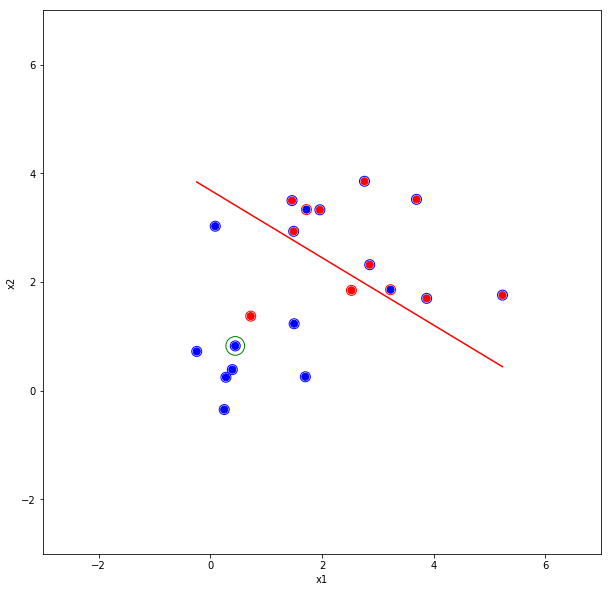

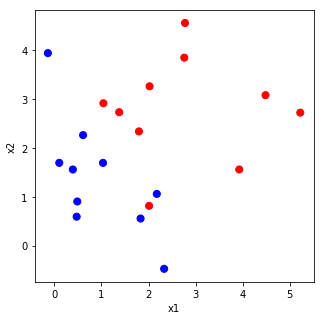


------------
Rodada #0

> x_i: [ 0.60926329  2.26294097  1.        ]
> w_i: [ 0.45125643  0.04458911  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 0.4860574   0.90506474  1.        ]
> w_i: [ 0.45125643  0.04458911  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.03315002  1.69472936  1.        ]
> w_i: [ 0.45125643  0.04458911  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 0.39209902  1.55936324  1.        ]
> w_i: [ 0.45125643  0.04458911  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 4.48433454  3.07992916  1.        ]
> w_i: [ 0.45125643  0.04458911  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.42883476  0.02918946  0.995     ]

> x_i: [ 1.37679195  2.7307892   1.        ]
> w_i: [ 0.42883476  0.02918946  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.4219508   0.01553551  0.99      ]

> x_i: [ 1.79618158  2.33831182  1.        ]
> w_i: [ 0.4219508   0.01553551  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizand

,x1,x2,y,b,y_hat,right_answer
0,0.392099,1.559363,1.0,1,1.0,1.0
1,1.830550,0.556745,1.0,1,1.0,1.0
2,0.103646,1.695740,1.0,1,1.0,1.0
3,0.609263,2.262941,1.0,1,1.0,1.0
4,2.331068,-0.471821,1.0,1,1.0,1.0
5,-0.138707,3.939800,1.0,1,1.0,1.0
6,1.033150,1.694729,1.0,1,1.0,1.0
7,2.175191,1.060262,1.0,1,-1.0,-1.0
8,0.472900,0.594715,1.0,1,1.0,1.0
9,0.486057,0.905065,1.0,1,1.0,1.0


,x1,x2,y
0,2.251186,0.495565,1.0
1,2.453201,-0.418119,1.0
2,1.802635,1.964305,1.0
3,1.843030,2.140134,1.0
4,2.444862,1.781894,1.0
5,0.901794,2.690192,1.0
6,-1.037305,-0.475159,1.0
7,1.544275,-0.799544,1.0
8,0.115323,1.921295,1.0
9,2.042592,1.257630,1.0


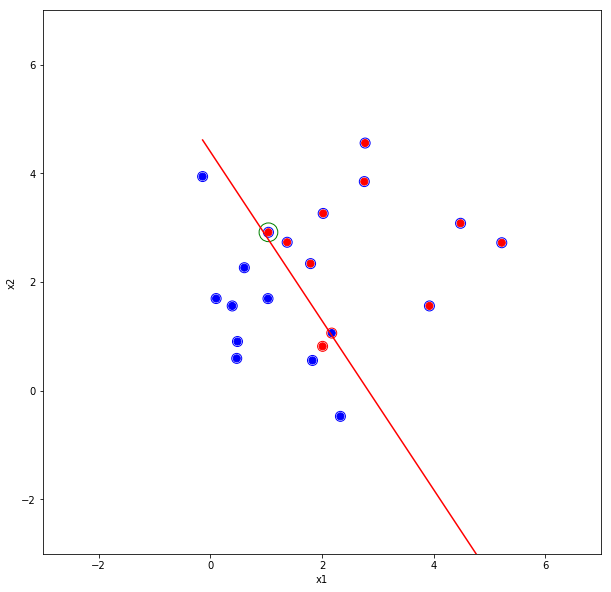

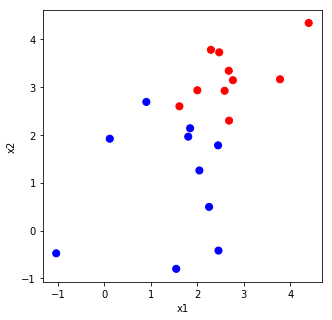


------------
Rodada #0

> x_i: [ 2.44486219  1.78189424  1.        ]
> w_i: [ 0.03841999 -0.12246209  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.5442746  -0.79954447  1.        ]
> w_i: [ 0.03841999 -0.12246209  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.29047168  3.78075393  1.        ]
> w_i: [ 0.03841999 -0.12246209  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.02696763 -0.14136586  0.995     ]

> x_i: [ 2.46967001  3.72751607  1.        ]
> w_i: [ 0.02696763 -0.14136586  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.01461928 -0.16000344  0.99      ]

> x_i: [ 2.68092136  2.29945286  1.        ]
> w_i: [ 0.01461928 -0.16000344  0.99      ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.00121467 -0.1715007   0.985     ]

> x_i: [ 2.67429843  3.34247121  1.        ]
> w_i: [ 0.00121467 -0.1715007   0.985     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.01215682 -0.18821306

,x1,x2,y,b,y_hat,right_answer
0,2.251186,0.495565,1.0,1,1.0,1.0
1,2.453201,-0.418119,1.0,1,1.0,1.0
2,1.802635,1.964305,1.0,1,1.0,1.0
3,1.843030,2.140134,1.0,1,1.0,1.0
4,2.444862,1.781894,1.0,1,1.0,1.0
5,0.901794,2.690192,1.0,1,1.0,1.0
6,-1.037305,-0.475159,1.0,1,1.0,1.0
7,1.544275,-0.799544,1.0,1,1.0,1.0
8,0.115323,1.921295,1.0,1,1.0,1.0
9,2.042592,1.257630,1.0,1,1.0,1.0


,x1,x2,y
0,1.941354,4.262119,1.0
1,2.269752,1.018118,1.0
2,1.674854,0.991255,1.0
3,0.960291,0.986601,1.0
4,0.445487,1.183034,1.0
5,0.462371,-0.273704,1.0
6,1.274989,0.428797,1.0
7,1.405136,-0.615250,1.0
8,0.869009,-0.484799,1.0
9,1.855676,1.516911,1.0


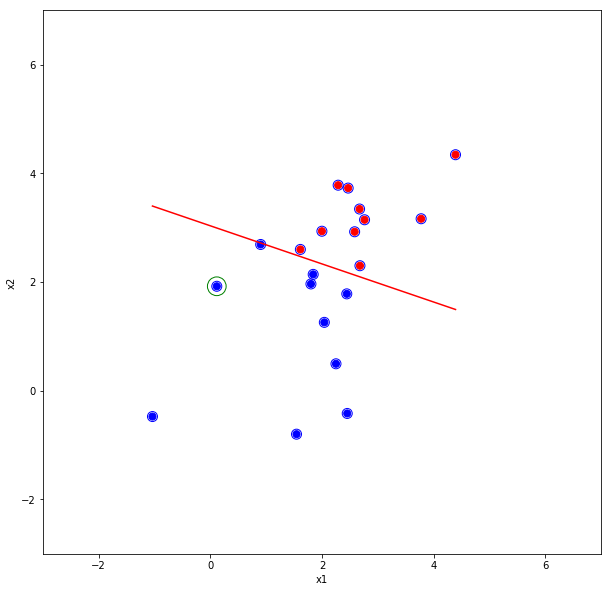

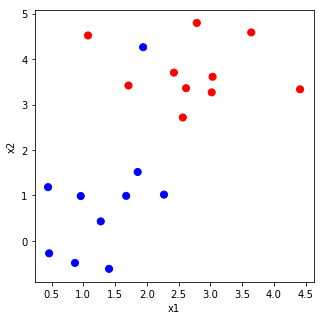


------------
Rodada #0

> x_i: [ 3.03435121  3.61194923  1.        ]
> w_i: [-0.28719515  0.03575853  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.30236691  0.01769879  0.995     ]

> x_i: [ 1.71125735  3.41948578  1.        ]
> w_i: [-0.30236691  0.01769879  0.995     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ -3.10923194e-01   6.01357509e-04   9.90000000e-01]

> x_i: [ 2.7859403   4.79608987  1.        ]
> w_i: [ -3.10923194e-01   6.01357509e-04   9.90000000e-01]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.3248529  -0.02337909  0.985     ]

> x_i: [ 0.46237143 -0.27370436  1.        ]
> w_i: [-0.3248529  -0.02337909  0.985     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.42604318  3.70312563  1.        ]
> w_i: [-0.3248529  -0.02337909  0.985     ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [-0.33698311 -0.04189472  0.98      ]

> x_i: [ 1.27498858  0.42879679  1.        ]
> w_i: [-0.33698311 -0.04

,x1,x2,y,b,y_hat,right_answer
0,1.941354,4.262119,1.0,1,-1.0,-1.0
1,2.269752,1.018118,1.0,1,1.0,1.0
2,1.674854,0.991255,1.0,1,1.0,1.0
3,0.960291,0.986601,1.0,1,1.0,1.0
4,0.445487,1.183034,1.0,1,1.0,1.0
5,0.462371,-0.273704,1.0,1,1.0,1.0
6,1.274989,0.428797,1.0,1,1.0,1.0
7,1.405136,-0.615250,1.0,1,1.0,1.0
8,0.869009,-0.484799,1.0,1,1.0,1.0
9,1.855676,1.516911,1.0,1,1.0,1.0


,x1,x2,y
0,1.634721,0.738535,1.0
1,1.308352,0.991346,1.0
2,1.799117,1.160799,1.0
3,1.188282,0.652474,1.0
4,1.067492,1.564785,1.0
5,0.317084,2.875175,1.0
6,0.978641,-0.902852,1.0
7,0.215040,2.190440,1.0
8,2.034378,0.845857,1.0
9,-0.328493,1.455973,1.0


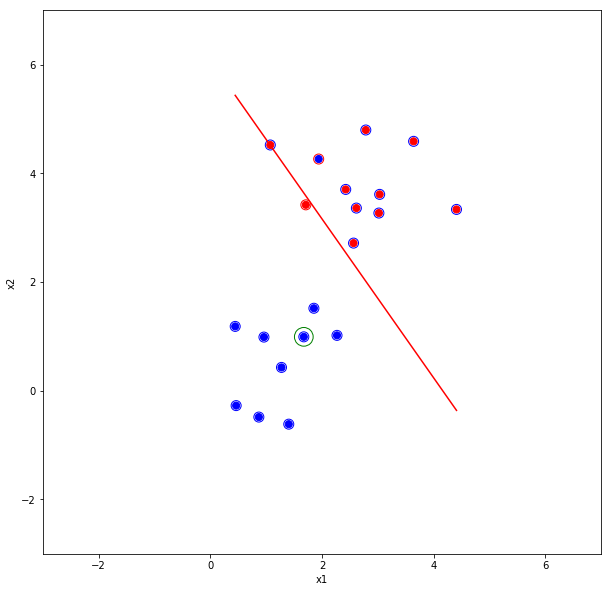

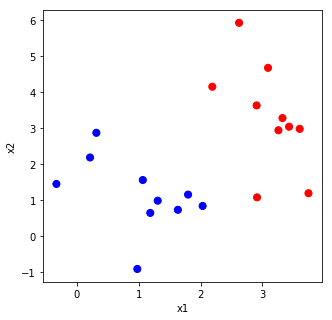


------------
Rodada #0

> x_i: [ 0.97864147 -0.9028516   1.        ]
> w_i: [ 0.35881504  0.03097685  1.        ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 3.32470502  3.28427898  1.        ]
> w_i: [ 0.35881504  0.03097685  1.        ]
> y_i: -1.0
> y_hat: 1.0
**********Atualizando pesos:
> w_i: [ 0.34219152  0.01455545  0.995     ]

> x_i: [ 1.30835155  0.99134553  1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.79911661  1.160799    1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 0.2150395   2.19043998  1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 1.18828195  0.65247403  1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [-0.32849293  1.45597337  1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i: 1.0
> y_hat: 1.0

> x_i: [ 2.03437813  0.84585701  1.        ]
> w_i: [ 0.34219152  0.01455545  0.995     ]
> y_i

,x1,x2,y,b,y_hat,right_answer
0,1.634721,0.738535,1.0,1,1.0,1.0
1,1.308352,0.991346,1.0,1,1.0,1.0
2,1.799117,1.160799,1.0,1,1.0,1.0
3,1.188282,0.652474,1.0,1,1.0,1.0
4,1.067492,1.564785,1.0,1,1.0,1.0
5,0.317084,2.875175,1.0,1,1.0,1.0
6,0.978641,-0.902852,1.0,1,1.0,1.0
7,0.215040,2.190440,1.0,1,1.0,1.0
8,2.034378,0.845857,1.0,1,1.0,1.0
9,-0.328493,1.455973,1.0,1,1.0,1.0


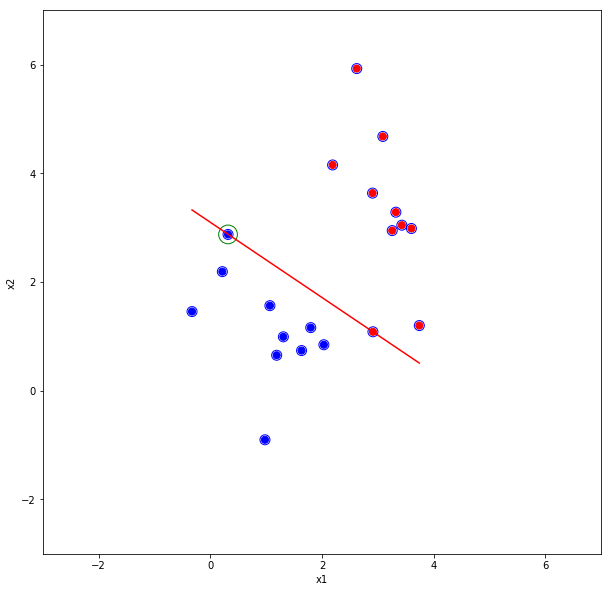

In [4]:
for jj in range(10):
    ## Conjunto de treinamento

    train_case = 'w'
    n_samples  = 10

    if train_case == 'AND':
        # Conjunto para o caso AND
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,-1,-1,-1]})
        print 'Caso "AND"'
        display(df_train)

    elif train_case == 'XOR':
        # Conjunto para o caso AND
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [-1,1,1,-1]})
        print 'Caso "AND"'
        display(df_train)

    elif train_case == 'XOR':
        # Conjunto para o caso OR
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,1,1,-1]})
        print 'Caso "OR"'
        display(df_train)

    else:
        mu1 = 1
        mu2 = 1
        sigma1 = 1
        sigma2 = 1
        x1 = sigma1*np.random.randn(n_samples) + mu1
        x2 = sigma2*np.random.randn(n_samples) + mu2
        df_train = pd.DataFrame({'x1': x1, 'x2': x2})
        df_train['y'] = 1

        mu1 = 3
        mu2 = 3
        sigma1 = 1
        sigma2 = 1
        x1 = sigma1*np.random.randn(n_samples) + mu1
        x2 = sigma2*np.random.randn(n_samples) + mu2
        df_train = df_train.append(pd.DataFrame({'x1': x1, 'x2': x2}), ignore_index=True)
        df_train.ix[df_train.y.isnull(), 'y'] = -1


    # Funcao que treina o perceptron
    max_epoch = 2
    d = 2

    import pdb
    def evalPerceptron(df, w, b=None):
        #pdb.set_trace()
        """
        Funcao que avalia a resposta de um neuronio para varias entradas.
        """
        if (b is not None) and ('b' not in df.columns):
            df['b'] = 1
            w = np.append(w, b)
        y = np.sign(np.inner(df.drop('y', axis=1), w))
        df['y_hat'] = y
        df['right_answer'] = df.y_hat*df.y
        return df

    def trainPerceptron(df, max_epoch=1000, d='infer', learning_rate=0.2,
                        w_init=None, b_init=None, debug=False, writer=None, ax=None):
        """
        Funcao que treina um perceptron, realizando no maximo (max_epoch) ciclos.
        """
        if d == 'infer':
            d = df.shape[1] - 1
        if (w_init is None):
            w_init = np.zeros(d)
        if (b_init is None):
            b_init = np.array([1])

        w_i = np.append(w_init, b_init)
        d = d + 1
        df['b'] = 1

        for i_epoch in range(max_epoch):
            if debug: print '\n------------\nRodada #%s' % i_epoch
            for ni, x_i in df.sample(df.shape[0]).iterrows():
                y_i = x_i.pop('y')
                x_i = x_i.values
                y_hat = neuronEval(x_i, w_i)
                if debug:
                    print '\n> x_i:', x_i
                    print '> w_i:', w_i
                    print '> y_i:', y_i
                    print '> y_hat:', y_hat
                    df1 = evalPerceptron(df.copy(), w_i, b=None)
                    plotSepPlane(df1, w_i, x_i=x_i, ax=ax, writer=writer)     
                if y_i*y_hat < 0:
                    w_i = w_i + learning_rate*y_i*x_i
                    if debug:
                        print '**********Atualizando pesos:\n> w_i:', w_i
                        df1 = evalPerceptron(df.copy(), w_i, b=None)
                        plotSepPlane(df1, w_i, x_i=x_i, ax=ax, writer=writer)     

        print 'Vetor de pesos:', w_i
        return w_i

    display(df_train)
    plotSepPlane(df_train, None)

    import matplotlib
    matplotlib.use("Agg")
    import matplotlib.animation as manimation

    FFMpegWriter = manimation.writers['ffmpeg']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                    comment='Movie support!')
    writer = FFMpegWriter(fps=5, metadata=metadata)


    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot([], [], 'k-o')

    with writer.saving(fig, "%s_training_test.mp4" % jj, 100):
        w = trainPerceptron(df_train, max_epoch=50, w_init=(np.random.random(2) - 0.5),
                            learning_rate=0.005, d='infer', debug=True, writer=writer, ax=ax)
        y = evalPerceptron(df_train, w)
        display(y)

In [ ]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test_2.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()